In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat

In [3]:
path = 'F://Downloads//_grib2netcdf-atls19-95e2cf679cd58ee9b4db4dd119a05a8d-NRkpvD.nc'
data = xr.open_dataset(path)

In [4]:
test = data.t2m[2::4].mean(dim = 'time') - 273.15

C:\Python27\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


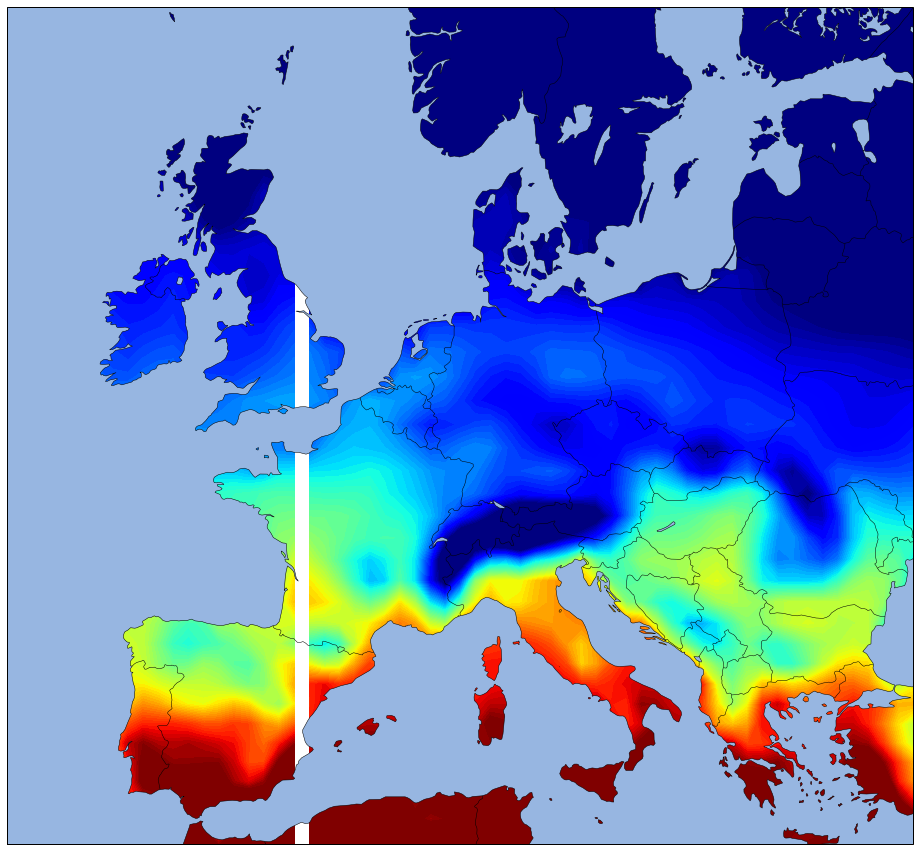

In [5]:
fig = plt.figure(figsize = (30,15))

# set up a map
ax = plt.axes(projection=ccrs.Mercator())

a = 1.
lw = .5

ax.set_extent([-15,30,35,60])


scale = '50m'
#ax.coastlines(resolution = scale, linewidth = lw, alpha = a)

# add borders
borders = cfeat.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', scale, facecolor='none', linewidth = lw, alpha = a)
ax.add_feature(borders)

# add lakes
lakes = cfeat.NaturalEarthFeature('physical', 'lakes', scale, edgecolor='black', facecolor= cfeat.COLORS['water'], linewidth = lw, alpha = a)
ax.add_feature(lakes)

# add oceans
ocean = cfeat.NaturalEarthFeature('physical', 'ocean', scale, edgecolor='black', facecolor= cfeat.COLORS['water'], linewidth = lw, alpha = a)
ax.add_feature(ocean)


test.plot.contourf(ax = ax, transform = ccrs.PlateCarree(), cmap = plt.cm.jet, add_colorbar = False, alpha = a, levels = np.linspace(10,20,64))